# Cifar-10 이미지 분류
### 전체 데이터 사용
### Data Augmentation 적용
### 출처: [Achieving 90% accuracy in Object Recognition ](https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/)

In [ ]:
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Activation, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import rmsprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### CIFAR10 데이터 로드

In [1]:
(X_train, y_train0), (X_test, y_test0) = cifar10.load_data()
print(X_train.shape, X_train.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test.shape, X_test.dtype)
print(y_test0.shape, y_test0.dtype)

Using TensorFlow backend.


(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) int32


#### 데이터 확인

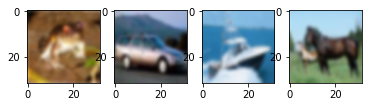

In [2]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

#### 자료형 변환 및 스케일링
- X: 실수형으로 정규화
- Y: 1-hot encoding
    * airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

In [3]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [4]:
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:4]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#### 모형 구현

In [6]:
np.random.seed(0)
weight_decay = 1e-4

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2(weight_decay), 
                 input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [10]:
opt_rms = rmsprop(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

In [11]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

In [13]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

In [15]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=64),
                    steps_per_epoch=X_train.shape[0] // 64, epochs=125,
                    verbose=1, validation_data=(X_test, Y_test),
                    callbacks=[LearningRateScheduler(lr_schedule)])

W0820 13:38:30.677202  5880 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/125
125/125 [==============================] - 74s 588ms/step - loss: 2.7439 - acc: 0.2802 - val_loss: 2.4410 - val_acc: 0.3655
Epoch 2/125
125/125 [==============================] - 72s 578ms/step - loss: 2.1183 - acc: 0.3625 - val_loss: 2.5318 - val_acc: 0.3990
Epoch 3/125
125/125 [==============================] - 72s 578ms/step - loss: 1.8571 - acc: 0.4219 - val_loss: 2.1268 - val_acc: 0.4285
Epoch 4/125
125/125 [==============================] - 72s 578ms/step - loss: 1.7021 - acc: 0.4535 - val_loss: 1.7928 - val_acc: 0.4625
Epoch 5/125
125/125 [==============================] - 72s 579ms/step - loss: 1.5668 - acc: 0.4899 - val_loss: 1.4428 - val_acc: 0.5290
Epoch 6/125
125/125 [==============================] - 72s 578ms/step - loss: 1.4739 - acc: 0.5222 - val_loss: 1.4376 - val_acc: 0.5545
Epoch 7/125
125/125 [==============================] - 73s 580ms/step - loss: 1.3842 - acc: 0.5429 - val_loss: 1.6575 - val_acc: 0.5410
Epoch 8/125
125/125 [===========================

Epoch 61/125
125/125 [==============================] - 72s 579ms/step - loss: 0.6118 - acc: 0.8315 - val_loss: 1.0299 - val_acc: 0.7510
Epoch 62/125
125/125 [==============================] - 72s 576ms/step - loss: 0.6104 - acc: 0.8295 - val_loss: 1.0033 - val_acc: 0.7540
Epoch 63/125
125/125 [==============================] - 73s 586ms/step - loss: 0.5988 - acc: 0.8390 - val_loss: 0.9129 - val_acc: 0.7845
Epoch 64/125
125/125 [==============================] - 72s 580ms/step - loss: 0.5964 - acc: 0.8409 - val_loss: 0.9443 - val_acc: 0.7715
Epoch 65/125
125/125 [==============================] - 74s 594ms/step - loss: 0.5922 - acc: 0.8393 - val_loss: 0.9250 - val_acc: 0.7755
Epoch 66/125
125/125 [==============================] - 73s 584ms/step - loss: 0.5846 - acc: 0.8421 - val_loss: 0.9885 - val_acc: 0.7575
Epoch 67/125
125/125 [==============================] - 73s 580ms/step - loss: 0.5767 - acc: 0.8421 - val_loss: 1.1854 - val_acc: 0.7320
Epoch 68/125
125/125 [===================

'\nhistory = model.fit(X_train, Y_train, epochs=50, batch_size=64, \n                    validation_data=(X_test, Y_test), verbose=2)\n'

#### 모델 평가하기

In [16]:
scores = model.evaluate(X_test, Y_test, batch_size=128, verbose=2)
print('\nTest result: %.4f loss: %.4f' % (scores[1], scores[0]))


Test result: 80.450 loss: 0.926


#### 모델 저장하기

In [17]:
model.save_weights('model/cifar10-full-v3.h5') 